In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


(Hours Studied                       0
 Previous Scores                     0
 Extracurricular Activities          0
 Sleep Hours                         0
 Sample Question Papers Practiced    0
 Performance Index                   0
 dtype: int64,
 <AxesSubplot:>)

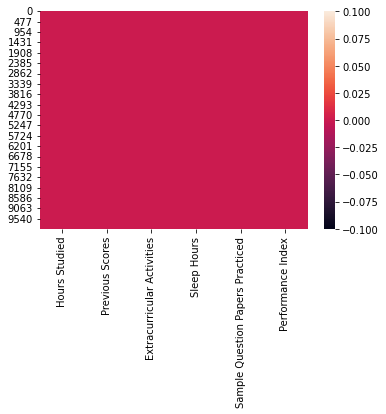

In [4]:
df.isna().sum(),sns.heatmap(df.isna())


In [5]:
df.duplicated().sum()


127

In [6]:
df.drop_duplicates(inplace=True,ignore_index=True)


Checking outliers:

<AxesSubplot:>

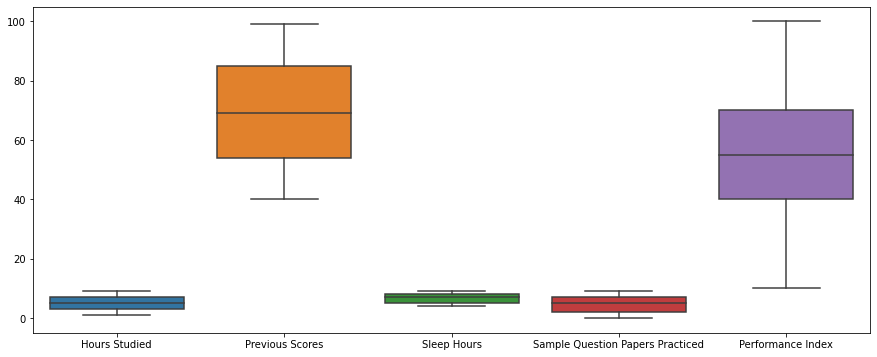

In [7]:
plt.figure(figsize=(15, 6))
sns.boxplot(df)

Checking if extra curricular activities have any impact on performance index:

<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Performance Index'>

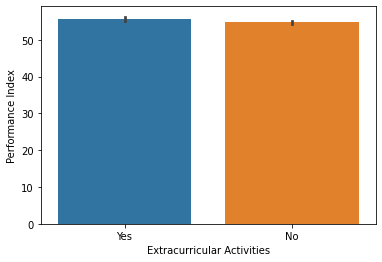

In [8]:
sns.barplot(x='Extracurricular Activities', y='Performance Index', data=df)

Extracting data of students who put maximum effort in their studies then checking the same,impact of extracurricular activities in performance index:

In [9]:
max_efforts=df.loc[(df['Hours Studied']>=8) & (df['Previous Scores']>=90) & (df['Performance Index']>=90) & (df['Sample Question Papers Practiced'])]

In [10]:
max_efforts

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
61,9,97,Yes,8,5,98.0
68,9,94,No,9,1,91.0
87,9,99,No,4,1,95.0
142,8,96,No,8,9,94.0
145,9,98,Yes,7,7,100.0
...,...,...,...,...,...,...
9340,9,95,No,5,7,90.0
9362,8,98,Yes,8,3,93.0
9419,9,97,No,6,9,97.0
9470,8,97,Yes,6,1,92.0


<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Performance Index'>

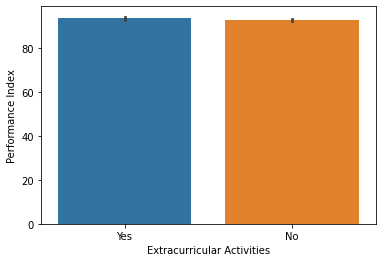

In [11]:
sns.barplot(x="Extracurricular Activities",y="Performance Index",data=max_efforts)

Extracting data of students who put minimum effort in their studies then checking the same,impact of extracurricular activities in performance index:

In [12]:
min_efforts=df.loc[(df['Hours Studied']<=2) & (df['Previous Scores']<=45) & (df['Performance Index']<40) & (df['Sample Question Papers Practiced']==False)]

In [13]:
min_efforts

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
46,1,43,Yes,7,0,17.0
626,2,42,No,4,0,15.0
1644,1,43,No,9,0,15.0
3227,1,40,No,6,0,15.0
3510,2,40,No,4,0,13.0
3537,1,41,Yes,8,0,13.0
4023,2,43,Yes,4,0,18.0
4335,2,45,Yes,6,0,19.0
4448,1,41,Yes,8,0,16.0
4672,1,45,Yes,4,0,20.0


<AxesSubplot:xlabel='Extracurricular Activities', ylabel='Performance Index'>

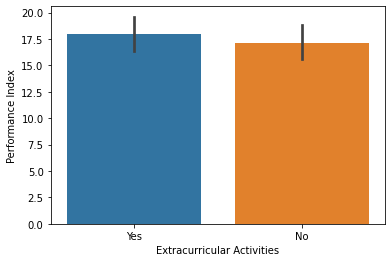

In [14]:
sns.barplot(x="Extracurricular Activities",y="Performance Index",data=min_efforts)

Conclusion: Half of the students in this dataset are involved in some form of extracurricular activities, while the other half are not engaged in any activities. The figures also indicate that the Performance Index does not depend on whether one participates in extracurricular activities or not. After examining students who dedicate varying levels of effort to their studies and plotting the graphs once again, no significant advantage was found for individuals with extracurricular activities in the Performance Index could be found.

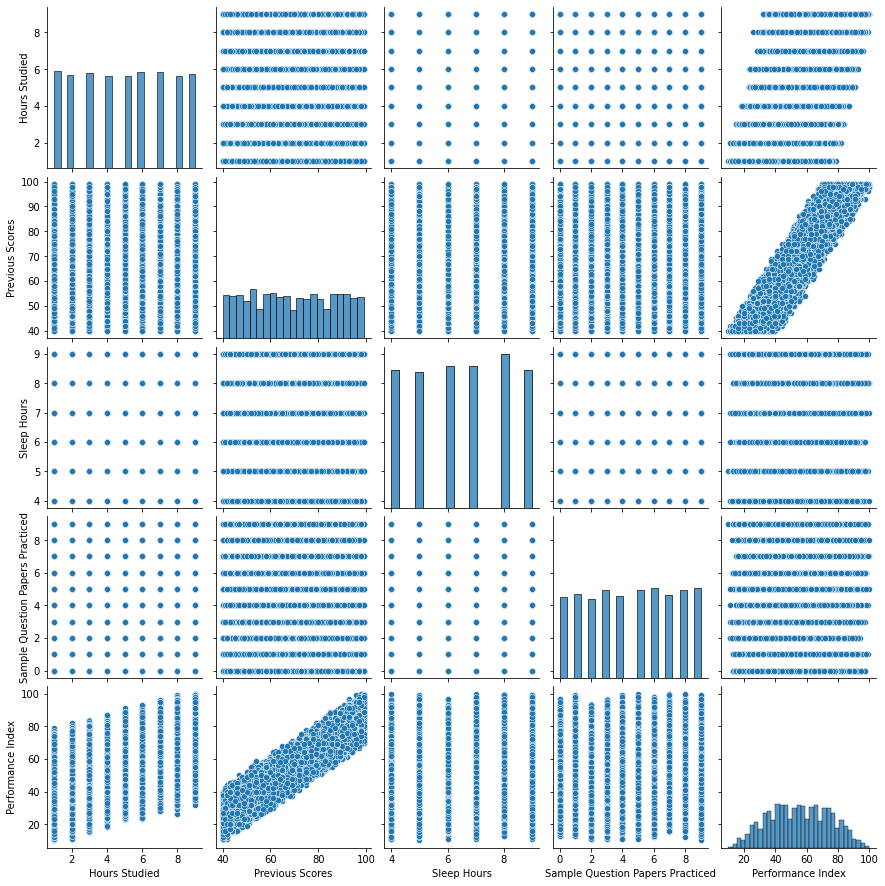

In [15]:
sns.pairplot(df)


Observation: Previous scores are strongly correlated with Performance Index



<AxesSubplot:xlabel='Previous Scores', ylabel='Performance Index'>

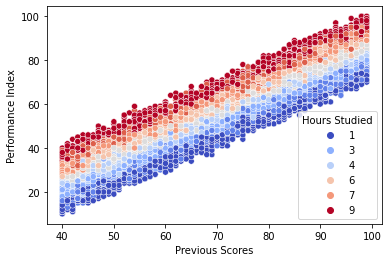

In [16]:
sns.scatterplot(df,x ='Previous Scores',y ='Performance Index', hue = df['Hours Studied'], palette = 'coolwarm', )

<AxesSubplot:xlabel='Hours Studied', ylabel='Performance Index'>

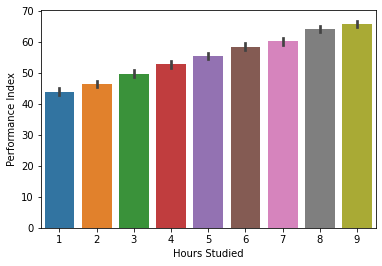

In [17]:
sns.barplot(x="Hours Studied",y="Performance Index",data=df)


Observation: Performance index directly depends upon Hours Studied,as people who spent maximum time possess maximum Performance Index



In [18]:
df['Extracurricular Activities']=df['Extracurricular Activities'].replace(['Yes','No'],[1,0])


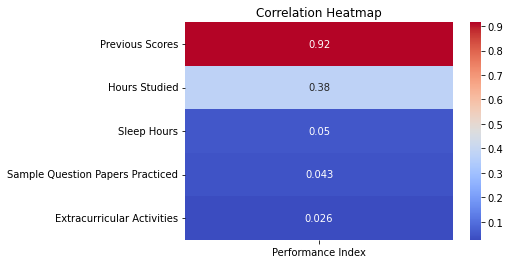

In [19]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix['Performance Index'].drop('Performance Index').sort_values(ascending=False).to_frame(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observation: Previous scores shows strong correlation with performance index,Then Hours studied also shows a positive correlation with performance Index.Previous pairplot results as well as scatterplot results reveals the same result as shown in the heatmap.

In [20]:
X=df.iloc[:,:-1]
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9868,1,49,1,4,2
9869,7,64,1,8,5
9870,6,83,1,8,5
9871,9,97,1,7,0


In [21]:
Y=df.iloc[:,-1]
Y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9868    23.0
9869    58.0
9870    74.0
9871    95.0
9872    64.0
Name: Performance Index, Length: 9873, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
pred

array([46.47091936, 80.24923008, 61.02996578, ..., 29.51491428,
       51.34505597, 64.87860811])

In [24]:
dfe=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Error':y_test-pred})
dfe

,Actual Value,Predicted Value,Error
6057,47.0,46.470919,0.529081
106,76.0,80.249230,-4.249230
9154,62.0,61.029966,0.970034
4680,23.0,22.732038,0.267962
2149,76.0,74.839305,1.160695
...,...,...,...
4417,78.0,75.697411,2.302589
9344,47.0,46.244763,0.755237
5840,30.0,29.514914,0.485086
2628,52.0,51.345056,0.654944


<AxesSubplot:xlabel='Actual Value', ylabel='Predicted Value'>

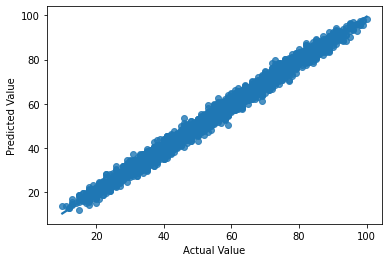

In [25]:
sns.regplot(x="Actual Value",y="Predicted Value",data=dfe)


Observation: the dots are tightly close to the line, it means that the predicted values are very close to the actual values, and the model is performing well in making accurate predictions

In [26]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("R2 Score:",r2_score(y_test,pred))

Mean Absolute Error: 1.6461997455341881
R2 Score: 0.9881593003934889
